In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/miabioinformatics/Gide_Quek_CancerCell2019/master/PD1-IPIPD1_counts.txt'
df = pd.read_csv(url,sep='\t', index_col=0)
gene_ensid_name_map = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_ensid_name.map')
df.index = df.index.map(gene_ensid_name_map)
df_mRNA = df.loc[df.index.dropna()]

In [3]:
df_mRNA.shape

(34664, 91)

In [54]:
from rnanorm.datasets import load_toy_data
from rnanorm import FPKM, TPM, CPM, TMM 
from rnanorm.methods.within_sample import BaseNormalizationWithGTF
from rnanorm.annotation import GTF
from rnanorm.methods.utils import LibrarySize

gene_length = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_id_length.map')
gene_name = pd.read_pickle('/n/data1/hms/dbmi/zitnik/lab/users/was966/TCGA/GDC_v37/gene_name_id.map')
gene_name_length = gene_name.map(gene_length)
common_genes = list(set(gene_name_length.keys()) & set(df_mRNA.index))

len(common_genes), len(df_mRNA)

(33857, 34664)

In [55]:
df_mRNA = df_mRNA.loc[common_genes].T
gene_name_length = gene_name_length.loc[common_genes]
tpm = TPM(gene_lengths = gene_name_length).set_output(transform ='pandas')
df_mRNA_TPM = tpm.fit_transform(df_mRNA)
df_mRNA_TPM = df_mRNA_TPM[~(df_mRNA_TPM.T.sum() == 0)].T

In [62]:
s1 = df_mRNA_TPM['PD1_13_EDT']

In [57]:
df_mRNA_TPM1 = pd.read_csv('./processed/abundance.csv', index_col=0)

,ipiPD1_19_EDT,ipiPD1_36_EDT,ipiPD1_35_EDT,ipiPD1_33_EDT,ipiPD1_27_EDT,ipiPD1_9_EDT,ipiPD1_4_EDT,ipiPD1_1_EDT,ipiPD1_47_PRE,ipiPD1_35_PRE,...,PD1_17_PRE,PD1_30_PRE,PD1_10_PRE,PD1_4_PRE,PD1_8_PRE,PD1_29_PRE,PD1_12_PRE,PD1_54_PRE,PD1_3_PRE,ipiPD1_13_EDT
AP000462.2,0.000000,0.000000,0.968492,0.000000,0.000000,2.005490,0.000000,0.000000,1.263546,0.000000,...,0.000000,0.000000,1.029049,1.063952,0.000000,0.000000,1.515078,2.542017,0.000000,0.000000
AC133106.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.147101,3.380782,0.000000,7.260066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC005703.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC105235.1,0.000000,0.411649,0.000000,1.594559,0.440753,0.000000,1.202797,1.777118,0.628294,0.000000,...,1.408148,0.739081,2.046764,1.587140,1.821028,2.063240,0.000000,2.528019,0.000000,0.532493
CIRBP,66.950850,59.752718,66.332749,60.327468,70.513203,47.776520,45.791673,56.760627,48.197899,72.521459,...,57.290646,49.530472,79.965228,59.745053,64.048643,78.647634,73.905743,58.215105,66.222162,63.930653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC01710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSN,99.889700,115.410277,162.638407,114.237820,129.018156,109.877034,149.180492,111.304583,174.285087,184.029718,...,138.481981,109.269092,108.205059,124.693292,104.750275,155.863446,149.998518,84.167574,121.115887,109.971057
HCRTR2,0.000000,0.000000,0.000000,0.491466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STAU2-AS1,0.468859,0.984056,0.383742,0.847073,0.000000,0.000000,2.396095,3.894221,1.001301,0.682290,...,1.496093,0.588930,0.407736,1.686264,2.418449,2.740123,7.203768,1.007214,0.411197,0.848625


In [63]:
s2 = df_mRNA_TPM1['ERR2208932']

In [87]:
ss = s1.to_frame(name='o').join(s2.to_frame(name='r')).dropna()

In [88]:
ss = np.log(ss+1e-4)

In [89]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'o'}>, <Axes: title={'center': 'r'}>]],
      dtype=object)

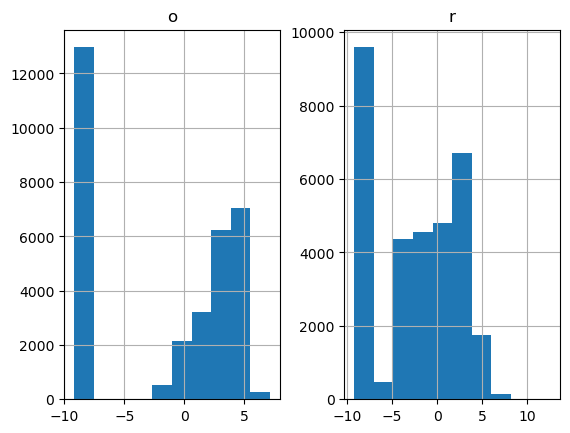

In [90]:
ss.hist()